# IA Player for Blokus

In [1]:
# ---------------------------------------------------------------------------------------- /modules/piece.py
# -*- coding: utf-8 -*-

from itertools import chain
from itertools import compress
from collections import OrderedDict

print('''
   Generate polyominos and their symmetries.
   
   Sources:
       https://wiki.haskell.org/The_Monad.Reader/Issue5/Generating_Polyominoes
       https://rosettacode.org/wiki/Free_polyominoes_enumeration#Python
       http://blokusstrategy.com/piece-names/ (for piece names)
   
   Each polyomino is represented as a list of 2 dimensional tuples.
   
   For example, a representation of L4 is the list: 
       [(0, 0), (0, 1), (0, 2), (1, 0)]
   and this is printed on a matrix as:
       X X X
       X
   
   The canonical representation of a polyomino is the smallest element of all
   plane symmetries of this polyomino.
   (smallest element using lexicographic order)
   The canonical representation of L4 is called L4_c and printed as:
       X X X
       X
   
   From this canonical representation, we deduce r, rr, rrr, s, rs, rrs, rrrs, 
   where:
   - r is 90 degree rotation to the right,
   - s is the reflection symmetry along the horizontal axis
   
   L4_r:
       X X
         X
         X
   
   L4_rr:
           X
       X X X
   
   L4_rrr:
       X 
       X  
       X X
   
   L4_s:
       X   
       X X X
   
   L4_rs (we apply s and then r):
       X X
       X  
       X  
   
   L4_rrs:
       X X X
           X
   
   L4_rrrs:
         X
         X
       X X
   
   Some polyomino only have one representation:
   For example, polyomino O has only one representation O_c 
   poly = [(0, 0), (0, 1), (1, 0), (1, 1)]
   
   O_c:
       X X
       X X
       
    We define the class Piece to manage any individual piece of the game,
   comprising:
   - name of the piece,
   - canonical representation,
   - other representations,
   - etc.
''')


   Generate polyominos and their symmetries.
   
   Sources:
       https://wiki.haskell.org/The_Monad.Reader/Issue5/Generating_Polyominoes
       https://rosettacode.org/wiki/Free_polyominoes_enumeration#Python
       http://blokusstrategy.com/piece-names/ (for piece names)
   
   Each polyomino is represented as a list of 2 dimensional tuples.
   
   For example, a representation of L4 is the list: 
       [(0, 0), (0, 1), (0, 2), (1, 0)]
   and this is printed on a matrix as:
       X X X
       X
   
   The canonical representation of a polyomino is the smallest element of all
   plane symmetries of this polyomino.
   (smallest element using lexicographic order)
   The canonical representation of L4 is called L4_c and printed as:
       X X X
       X
   
   From this canonical representation, we deduce r, rr, rrr, s, rs, rrs, rrrs, 
   where:
   - r is 90 degree rotation to the right,
   - s is the reflection symmetry along the horizontal axis
   
   L4_r:
       X X
         X
 

In [2]:
################################################################
# Generating canonical form and all forms of a given polyomino #
################################################################

def minima(poly):
    '''
       Finds the min x and y coordinate of a polyomino.
       
       Note that pieces are translated to get minima(poly) == (0, 0)
       Example:
           poly = [(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)] # polyomino called X
           minima(poly) # (0, 0)
    '''
    return (min(pt[0] for pt in poly), min(pt[1] for pt in poly))


def maxima(poly):
    '''Finds the max x and y coordinate of a polyomino.
    
    Example:
        poly = [(0, 0), (0, 1), (0, 2), (1, 0)] # polyomino called L4
        maxima(poly) # (1, 2)
    '''
    return (max(pt[0] for pt in poly), max(pt[1] for pt in poly))

def text_representation(poly, char = '#'):
    '''Generates a textual representation of a polyomino.'''
    # text_representation_with_corners() outperforms text_representation(),
    # but we keep it for easier understanding of the code
    min_pt = minima(poly)
    max_pt = maxima(poly)
    table = [[' '] * (max_pt[1] - min_pt[1] + 1)
             for _ in range(max_pt[0] - min_pt[0] + 1)]
    for pt in poly:
        table[pt[0] - min_pt[0]][pt[1] - min_pt[1]] = char
    return('\n'.join([''.join(row) for row in table]))

In [3]:
# Examples
poly1 = [(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)]
poly2 = [(0, 0), (0, 1), (0, 2), (1, 0)]
poly3 = [(0, 0), (0, 1), (1, 0), (1, 1)]

print(minima(poly1))
print(maxima(poly1))

print(text_representation(poly1), '\n')
print(text_representation(poly2), '\n')
print(text_representation(poly3), '\n')

(0, 0)
(2, 2)
 # 
###
 #  

###
#   

##
## 



In [4]:
def translate_to_origin(poly):
    '''Translates a polyomino such that minima(poly) == (0, 0).'''
    (minx, miny) = minima(poly)
    return [(x - minx, y - miny) for (x, y) in poly]

 
def rotate90(xy):
    '''Rotates 90 degrees to the right'''
    x, y = xy
    return((y, -x))
    
def rotate180(xy):
    '''Rotates 180 degrees'''
    x, y = xy
    return((-x, -y))
   
def rotate270(xy):
    '''Rotates 270 degrees to the right'''
    x, y = xy
    return((-y,  x))
    
def reflect(xy):
    '''Reflection'''
    x, y = xy
    return((-x,  y))



def rotations_and_reflections(poly):
    '''All the plane symmetries of a rectangular region.''' # may contain doublons
    symm_polys = [poly, 
                  [rotate90(pt) for pt in poly],
                  [rotate180(pt) for pt in poly],
                  [rotate270(pt) for pt in poly],
                  [reflect(pt) for pt in poly],
                  [rotate90(reflect(pt)) for pt in poly],
                  [rotate180(reflect(pt)) for pt in poly],
                  [rotate270(reflect(pt)) for pt in poly]]
    symm_polys = [sorted(translate_to_origin(pl)) for pl in symm_polys]
    return(symm_polys)

In [32]:
out1 = rotations_and_reflections(poly1)
[print(text_representation(o), '\n') for o in out1]
out2 = rotations_and_reflections(poly2)
[print(text_representation(o), '\n') for o in out2]
out3 = rotations_and_reflections(poly3)
[print(text_representation(o), '\n') for o in out3]

 # 
###
 #  

 # 
###
 #  

 # 
###
 #  

 # 
###
 #  

 # 
###
 #  

 # 
###
 #  

 # 
###
 #  

 # 
###
 #  

###
#   

##
 #
 # 

  #
### 

# 
# 
## 

#  
### 

##
# 
#  

###
  # 

 #
 #
## 

##
## 

##
## 

##
## 

##
## 

##
## 

##
## 

##
## 

##
## 



[None, None, None, None, None, None, None, None]

In [5]:
def canonical(poly):
    '''Get the canonical form of a given polyomino poly.'''
    return min(rotations_and_reflections(poly))

In [28]:
# Example with L4:
canonical([(0, 2), (1, 0), (1, 1), (1, 2)])# == [(0, 0), (0, 1), (0, 2), (1, 0)]

[(0, 0), (0, 1), (0, 2), (1, 0)]

In [6]:
def idx_non_duplicates(lst):
    ''' 
        Non duplicates index of a list (keeping it ordered)
        Inspired from f7 at https://www.peterbe.com/plog/uniqifiers-benchmark
        
        Example:
        idx_non_duplicates([1,4,6,4,3,1,1,7]) # [0, 1, 2, 4, 7]
    '''
    # Transform the list into tuple:
    tple = [tuple(i) for i in lst]
    
    # Get indexes:
    seen = set()
    seen_add = seen.add
    return [i for (i,x) in enumerate(tple) if not (x in seen or seen_add(x))]

    
def rotations_and_reflections_unique_dict(canonical_poly):
    '''All the unique plane symmetries of a rectangular region.
       Outputs an ordered dict.
       Input must be the canonical form of a given polyomino, obtained using
       canonical(poly).
    '''
    move_names = ["c", "r", "rr", "rrr", "s", "rs", "rrs", "rrrs"]
    symm_polys = rotations_and_reflections(canonical_poly)
    idx = idx_non_duplicates(symm_polys)
    # {move_names[i]: symm_polys[i] for i in idx}
    output = OrderedDict([(move_names[i], symm_polys[i]) for i in idx])
    return(output)

In [7]:
# # Examples with polyomino O:
canonical_poly = [(0, 0), (0, 1), (1, 0), (1, 1)] # O
symm_polys = rotations_and_reflections(canonical_poly)
print(idx_non_duplicates(symm_polys)) # [0]

rotations_and_reflections_unique_dict(canonical_poly)


# # Examples with polyomino L4:
canonical_poly = [(0, 0), (0, 1), (0, 2), (1, 0)] # L4
symm_polys = rotations_and_reflections(canonical_poly)
print(idx_non_duplicates(symm_polys)) # [0, 1, 2, 3, 4, 5, 6, 7]

rotations_and_reflections_unique_dict(canonical_poly)

[0]
[0, 1, 2, 3, 4, 5, 6, 7]


OrderedDict([('c', [(0, 0), (0, 1), (0, 2), (1, 0)]),
             ('r', [(0, 0), (0, 1), (1, 1), (2, 1)]),
             ('rr', [(0, 2), (1, 0), (1, 1), (1, 2)]),
             ('rrr', [(0, 0), (1, 0), (2, 0), (2, 1)]),
             ('s', [(0, 0), (1, 0), (1, 1), (1, 2)]),
             ('rs', [(0, 0), (0, 1), (1, 0), (2, 0)]),
             ('rrs', [(0, 0), (0, 1), (0, 2), (1, 2)]),
             ('rrrs', [(0, 1), (1, 1), (2, 0), (2, 1)])])

In [8]:
# version avec dictionnaires de
# - idx_non_duplicates
# - rotations_and_reflections_unique_dict

def dic_poly(poly):
    '''returns dictionary with the different transformations of a polyomino as values,
       starting with its canonical form, and the symmetries used to obtain these 
       transformations as keys.
       ex : dic_poly([(0, 2), (1, 0), (1, 1), (1, 2)]) will return
       
                {'c': [(0, 0), (0, 1), (0, 2), (1, 0)],
                 'r': [(0, 0), (0, 1), (1, 1), (2, 1)],
                 'rr': [(0, 2), (1, 0), (1, 1), (1, 2)],
                 'rrr': [(0, 0), (1, 0), (2, 0), (2, 1)],
                 's': [(0, 0), (1, 0), (1, 1), (1, 2)],
                 'rs': [(0, 0), (0, 1), (1, 0), (2, 0)],
                 'rrs': [(0, 0), (0, 1), (0, 2), (1, 2)],
                 'rrrs': [(0, 1), (1, 1), (2, 0), (2, 1)]}
        
        if different keys have same value then only the first key is kept, where keys are ordered as
        
                 ["c", "r", "rr", "rrr", "s", "rs", "rrs", "rrrs"]
    '''
    sortie = {}
    poly = canonical(poly)
    move_names = ["c", "r", "rr", "rrr", "s", "rs", "rrs", "rrrs"]
    symm_polys = rotations_and_reflections(poly)
    for i in range(8):
        piece = symm_polys[i]
        if piece not in sortie.values() :
            sortie[move_names[i]] = piece
            
    return sortie

In [9]:
# Example with L4:
dic_poly([(0, 2), (1, 0), (1, 1), (1, 2)])

{'c': [(0, 0), (0, 1), (0, 2), (1, 0)],
 'r': [(0, 0), (0, 1), (1, 1), (2, 1)],
 'rr': [(0, 2), (1, 0), (1, 1), (1, 2)],
 'rrr': [(0, 0), (1, 0), (2, 0), (2, 1)],
 's': [(0, 0), (1, 0), (1, 1), (1, 2)],
 'rs': [(0, 0), (0, 1), (1, 0), (2, 0)],
 'rrs': [(0, 0), (0, 1), (0, 2), (1, 2)],
 'rrrs': [(0, 1), (1, 1), (2, 0), (2, 1)]}

In [10]:
############################################################
# Generating all canonical polyominos given a certain rank #
############################################################

def concat_map(func, it):
    '''
       Apply a mapping then flatten the resulting nested list
    
       Example:
           func = lambda x: [x, -x]
           it = range(2)
           concat_map(func, it) # [0, 0, 1, -1]
    '''
    return list(chain.from_iterable(map(func, it)))
# # Explanation of the function:
# # 1/ chain.from_iterable used to flatten a nested list:
# l = [[0], [1, 2], [2], [3, 6], [4], [5, 10]]
# list(chain.from_iterable(l)) # [0, 1, 2, 2, 3, 6, 4, 5, 10]
# # 2/ map apply function func on each element of iterable it
# list(map(lambda x: [x, -x], range(2))) # [[0, 0], [1, -1]]
# # 3/ Combined, we obtain:
# concat_map(lambda x: [x, -x], range(2)) # [0, 0, 1, -1]

def unique(lst):
    ''' Return unique elements of a list'''
    return(list(lst[k] for k in idx_non_duplicates(lst)))
# Example:
#symm_polys = rotations_and_reflections([(0, 0), (0, 1), (0, 2), (1, 0)]) # L4
#unique(symm_polys) # 8 elements, each a representation of L4
#symm_polys = rotations_and_reflections([(0, 0), (0, 1), (1, 0), (1, 1)]) # O
#unique(symm_polys) # Only 1 element: [[(0, 0), (0, 1), (1, 0), (1, 1)]]

In [11]:
def contiguous(xy):
    '''All four points in Von Neumann neighborhood.'''
    x, y = xy
    return([(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)])


def border(poly):
    '''Finds all points at the border of a polyomino (without corners).
       Those points can be added to a polyomino to increase its rank'''
    return unique([pt for pt in concat_map(contiguous, poly) if pt not in poly])
# # Example 1
# poly = [(0, 0), (0, 1), (0, 2), (1, 0)] # L4
# sorted(border(poly)) 
# # [(-1, 0), (-1, 1), (-1, 2), (0, -1), (0, 3), (1, -1), (1, 1), (1, 2), (2, 0)]
# # represented with '*' on the following representation:
# #    * * *
# #  * O O O *
# #  * O * *
# #    *
# 
# # Example 2
# poly = [(0, 0), (0, 1), (1, 0), (1, 1)] # O
# sorted(border(poly)) 
# # [(-1, 0), (-1, 1), (0, -1), (0, 2), (1, -1), (1, 2), (2, 0), (2, 1)]
# # represented with '*' on the following representation:
# #    * *
# #  * O O *
# #  * O O *
# #    * *

def new_polys(poly):
    ''' Adds all possible border to polyomino poly.'''
    return unique([canonical(poly + [pt]) for pt in border(poly)])
# # Example 1
# poly = [(0, 0), (0, 1), (0, 2), (1, 0)] # L4
# ([print(text_representation(i), '\n') for i in new_polys(poly)])
# # Example 2
# poly = [(0, 0), (0, 1), (1, 0), (1, 1)] # O
# ([print(text_representation(i), '\n') for i in new_polys(poly)])

In [12]:
print('Example 1 \n')
poly = [(0, 0), (0, 1), (0, 2), (1, 0)] # L4
print(text_representation(poly), '\n')
([print(text_representation(i), '\n') for i in new_polys(poly)])
print('Example 2 \n')
poly = [(0, 0), (0, 1), (1, 0), (1, 1)] # O
print(text_representation(poly), '\n')
([print(text_representation(i), '\n') for i in new_polys(poly)])

Example 1 

###
#   

###
 # 
 #  

####
 #   

## 
 ##
 #  

###
##  

## 
 # 
 ## 

###
# # 

####
#    

###
#  
#   

### 
  ## 

Example 2 

##
## 

###
##  



[None]

In [13]:
def monominoe():
    ''' Initialize polyominos with monominoe.'''
    monomino = [(0, 0)]
    return(monomino)

def rank_fun(n):
    '''Generates polyominoes of rank n recursively.'''
    assert n >= 0
    if n == 0: return []
    if n == 1: return [monominoe()]
    return sorted(unique(concat_map(new_polys, rank_fun(n - 1))))
# Test cases:
# print([len(rank(n)) for n in range(1, 11)]) 
# # [1, 1, 2, 5, 12, 35, 108, 369, 1285, 4655] as expected at http://oeis.org/A000105
#
# ([print(text_representation(i), '\n') for i in rank(1)])
# ([print(text_representation(i), '\n') for i in rank(2)])
# ([print(text_representation(i), '\n') for i in rank(3)])
# ([print(text_representation(i), '\n') for i in rank(4)])
# ([print(text_representation(i), '\n') for i in rank(5)])

In [14]:
#####################
# Polyomino corners #
#####################
def diagonal(xy):
    '''All four points in the diagonal.'''
    x, y = xy
    return([(x - 1, y - 1), (x - 1, y + 1), (x + 1, y - 1), (x + 1, y + 1)])

def corners(poly):
    '''Finds all points at the corner of a polyomino (without border)'''
    candidates = unique([pt for pt in concat_map(diagonal, poly) if pt not in poly])   
    
    def is_corner(candidate, poly):
        '''Check whether candidate is a corner or not (outputs a boolean)'''
        # [i for i in contiguous(candidate) if i in poly] is the list of 
        # contiguous elements of the candidate which are in the initial poly.
        # If any element is like this (i.e. non empty list), then the candidate
        # is not a corner.
        # If the list is empty, the candidate is a corner.
        return(not [i for i in contiguous(candidate) if i in poly])
    
    # https://stackoverflow.com/questions/18665873/filtering-a-list-based-on-a-list-of-booleans
    fil = [is_corner(candidate, poly) for candidate in candidates]
    corner_out = list(compress(candidates, fil))
    return(sorted(corner_out))
    
# # Example 1
# poly = [(0, 0), (0, 1), (0, 2), (1, 0)] # L4
# corners(poly)
# # [(-1, -1), (-1, 3), (1, 3), (2, -1), (2, 1)]
# # represented with '*' on the following representation:
# #  *       *
# #    O O O
# #    O     *
# #  *   *
# 
# # Example 2
# poly = [(0, 0), (0, 1), (1, 0), (1, 1)] # O
# corners(poly)
# # [(-1, -1), (-1, 2), (2, -1), (2, 2)]
# # represented with '*' on the following representation:
# #  *     *
# #    O O 
# #    O O 
# #  *     *

def text_representation_with_corners(poly, char = '#', char_corners = '*'):
    '''Generates a textual representation of a polyomino with its corners.'''
    poly_corners = corners(poly)
    min_pt = minima(poly_corners)
    max_pt = maxima(poly_corners)
    table = [[' '] * (max_pt[1] - min_pt[1] + 1)
             for _ in range(max_pt[0] - min_pt[0] + 1)]
    for pt in poly:
        table[pt[0] - min_pt[0]][pt[1] - min_pt[1]] = char
    for pt in poly_corners:
        table[pt[0] - min_pt[0]][pt[1] - min_pt[1]] = char_corners
    return('\n'.join([''.join(row) for row in table]))
# # Example 1
# poly = [(0, 0), (0, 1), (0, 2), (1, 0)] # L4
# print(text_representation_with_corners(poly))
#
# # Example 2
# poly = [(0, 0), (0, 1), (1, 0), (1, 1)] # O
# print(text_representation_with_corners(poly))

## Les classes

In [15]:
###############
# Class Piece #
###############
class Piece(list):
    def __init__(self, my_list = monominoe(), name = None, color = None):
            
        # Initialize with the canonical version of the piece
        canonical_args = canonical(my_list)        
        list.__init__(self, canonical_args)
        
        # content
        self.name = name if name is not None else str(my_list)
        self.color = color
        self.forms = rotations_and_reflections_unique_dict(canonical_args)
        
        
    def text_repr(self):
        ''' Give a visual representation as a matrix of the piece'''
        print(text_representation_with_corners(self, '#', ' '))
        
        
    def summary(self, with_corners = True):
        ''' Give a visual representation of all representations of the piece
            with names'''
        print('*** Piece', self.name, '***')
        for key, poly in self.forms.items():
            print('<', key, '>')
            char_corners = '*'
            if not with_corners:
                char_corners = ' '
            print(text_representation_with_corners(poly, '#', char_corners), '\n')

        
    def size(self):
        ''' Give size of the canonical represention of the piece, 
            with index begining at 0'''
        return(maxima(self))
        
        
    def nb_of_repr(self):
        ''' Give number of representation of the piece, between 1 and 8.'''
        return(len(self.forms))

In [16]:
# # Example
my_piece = Piece([(3, -1), (3, 0), (4, 0), (4, 1)], 'Z4')
my_piece.text_repr()
my_piece.summary()
my_piece.summary(with_corners = False)
my_piece.size()
my_piece.nb_of_repr()
my_piece.forms
#my_piece.forms['r']
#corners(my_piece.forms['r'])

     
 ##  
  ## 
     
*** Piece Z4 ***
< c >
*  * 
 ## *
* ## 
 *  * 

< r >
 * *
* # 
 ## 
 # *
* *  

< s >
 *  *
* ## 
 ## *
*  *  

< rs >
* * 
 # *
 ## 
* # 
 * * 

*** Piece Z4 ***
< c >
     
 ##  
  ## 
      

< r >
    
  # 
 ## 
 #  
     

< s >
     
  ## 
 ##  
      

< rs >
    
 #  
 ## 
  # 
     



OrderedDict([('c', [(0, 0), (0, 1), (1, 1), (1, 2)]),
             ('r', [(0, 1), (1, 0), (1, 1), (2, 0)]),
             ('s', [(0, 1), (0, 2), (1, 0), (1, 1)]),
             ('rs', [(0, 0), (1, 0), (1, 1), (2, 1)])])

In [17]:
#####################
# Class BagOfPieces #
#####################

class BagOfPieces(list):
    def __init__(self, color = 'blue', player = 0, max_rank = 5):
        '''Define a colored bag of pieces assigned to a specific player'''
        
        # specify content mounted with BagOfPieces list
        self.color = color
        self.player = player
        self.max_rank = max_rank
        
        # construction of the list of pieces
        self.pieces = []
        names = dict()
        names[1] = ['1']
        names[2] = ['2']
        names[3] = ['I3', 'V3']
        names[4] = ['I4', 'L4', 'T4', 'O', 'Z4']
        names[5] = ['I5', 'L5', 'Y', 'P', 'U', 'V5', 'T5', 'N', 'F', 'W', 'Z5', 'X']
        for r in range(1, max_rank+1):
            try:
                names_r = names[r]
            except KeyError:
                names_r = None
            to_add = [Piece(poly, name, color) for poly, name in zip(rank_fun(r), names_r)]
            self.pieces.append(to_add)
        self.pieces = list(chain.from_iterable(self.pieces))
        
        # implementation of the class as python list
        list.__init__(self, self.pieces)
    
    def selectPiece(self, piece_name) :
        for piece in self.pieces :
            if piece.name == piece_name :
                return piece
        print('no piece found')
        return None

In [18]:
# Example
bag = BagOfPieces(color = 'blue', player = 0)
print(bag)
bag.pieces
#bag.pieces[8].summary()

[[(0, 0)], [(0, 0), (0, 1)], [(0, 0), (0, 1), (0, 2)], [(0, 0), (0, 1), (1, 0)], [(0, 0), (0, 1), (0, 2), (0, 3)], [(0, 0), (0, 1), (0, 2), (1, 0)], [(0, 0), (0, 1), (0, 2), (1, 1)], [(0, 0), (0, 1), (1, 0), (1, 1)], [(0, 0), (0, 1), (1, 1), (1, 2)], [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)], [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0)], [(0, 0), (0, 1), (0, 2), (0, 3), (1, 1)], [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1)], [(0, 0), (0, 1), (0, 2), (1, 0), (1, 2)], [(0, 0), (0, 1), (0, 2), (1, 0), (2, 0)], [(0, 0), (0, 1), (0, 2), (1, 1), (2, 1)], [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3)], [(0, 0), (0, 1), (1, 1), (1, 2), (2, 1)], [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2)], [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2)], [(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)]]


[[(0, 0)],
 [(0, 0), (0, 1)],
 [(0, 0), (0, 1), (0, 2)],
 [(0, 0), (0, 1), (1, 0)],
 [(0, 0), (0, 1), (0, 2), (0, 3)],
 [(0, 0), (0, 1), (0, 2), (1, 0)],
 [(0, 0), (0, 1), (0, 2), (1, 1)],
 [(0, 0), (0, 1), (1, 0), (1, 1)],
 [(0, 0), (0, 1), (1, 1), (1, 2)],
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],
 [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0)],
 [(0, 0), (0, 1), (0, 2), (0, 3), (1, 1)],
 [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1)],
 [(0, 0), (0, 1), (0, 2), (1, 0), (1, 2)],
 [(0, 0), (0, 1), (0, 2), (1, 0), (2, 0)],
 [(0, 0), (0, 1), (0, 2), (1, 1), (2, 1)],
 [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3)],
 [(0, 0), (0, 1), (1, 1), (1, 2), (2, 1)],
 [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2)],
 [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2)],
 [(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)]]

In [114]:
piece = Piece([(0, 0), (0, 1)])

In [115]:
bag.remove(piece)

In [118]:
print(len(bag))
len(bag.pieces)

20


21

In [119]:
bag.pieces.remove(piece)

In [120]:
print(len(bag))
len(bag.pieces)

20


20

In [124]:
print(bag[0], type(bag[0]))

[(0, 0)] <class '__main__.Piece'>


In [125]:

print(bag.pieces[0], type(bag.pieces[0]))

[(0, 0)] <class '__main__.Piece'>


In [19]:
# ---------------------------------------------------------------------------------------- /modules/board.py
# -*- coding: utf-8 -*-
# from modules.piece import BagOfPieces

###############
# Class Board #
###############

def define_color2player() :
    '''Allows manual assignment of each color to a player. Colors can be discarted, 
       and a same player can play several colors.
    '''
    Sortie = {}
    colors = ['blue', 'yellow', 'red', 'green']
    for color in colors :
        player = input('player number for color {} (integer between 1 and 4, or 0 if color discarted) : '.format(color))
        try :
            Sortie[color] = int(player)
        except KeyError as e:
            print(e)
    return Sortie
# # Ex :
# color2player = define_color2player()
# color2player


def selectPiece(piece_name):
    bag = BagOfPieces()
    piece = bag.selectPiece(piece_name)
    return piece

In [20]:
color2player = define_color2player()

player number for color blue (integer between 1 and 4, or 0 if color discarted) : 1
player number for color yellow (integer between 1 and 4, or 0 if color discarted) : 2
player number for color red (integer between 1 and 4, or 0 if color discarted) : 5
player number for color green (integer between 1 and 4, or 0 if color discarted) : 8


In [21]:
color2player

{'blue': 1, 'yellow': 2, 'red': 5, 'green': 8}

In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [93]:
class Board:
    '''The state of a game consists of a collection of colors with associated player, 4
       with for each color :
    
        - A bag of available pieces of this color, stored in self.bags
        - The space already filled by this color on the board, stored in self.occupancies
        
       To update the game state, the module needs :
        
        - a piece name
        - a piece orientation
        - a position on the board
        
    '''
    # ------------ initialization -------------
    def __init__(self, color2player, board_size = 20, max_rank = 5):
        
        # define main content of a board, that is, for each color to be played :
        #      - bag of remaining pieces 
        #      - positions of already placed pieces
        self.colors = []
        self.bags = {}
        self.occupancies = {}
        
        # initialize bag of pieces and occupied zone for each color to be played
        for color, player in color2player.items():
            if player != 0 :
                self.colors.append(color)
                self.bags[color] = BagOfPieces(color, player, max_rank)
                self.occupancies[color] = np.zeros((board_size, board_size))
        
        # keep relevant quantities
        self.color2player = color2player
        self.board_size = board_size
        self.max_rank = max_rank
        self.corners = {'blue'   : (board_size-1, 0), 
                        'yellow' : (0, 0),
                        'red'    : (0, board_size-1), 
                        'green'  : (board_size-1, board_size-1)
                       }
        self.to_play = self.colors[0] # current player, initialized at first color to be played
        
        #self.players = color2player.values()
    
    
    
    # -------------- interface ----------------
    def show(self):
        '''Shows the board filled with played pieces'''
        # performs weighted sum of occupancy matrices
        vals = sum([self.occupancies[color] * 2*(int(i)+1) for i, color in enumerate(self.occupancies)])
        
        # defines thresholds for colormap
        cmap = mpl.colors.ListedColormap(['white'] + list(self.colors))
        bounds = [ 2*int(i)+1 for i in range(-1, len(self.colors)+1)]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        
        # defines matplotlib img  
        fig, ax = plt.subplots()
        img = ax.imshow(vals, interpolation='nearest', cmap=cmap, norm=norm)
        
        # adds grid
        ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
        ax.set_xticks([i for i in range(self.board_size +1)])
        ax.set_yticks([i for i in range(self.board_size +1)])
        #img = plt.imshow(vals, cmap = cmap, norm=norm)
        
        # displays colors to be played
        plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks = [])# [2*int(i) for i in range(len(self.colors)+1)] )
        plt.show()

        
    def show_available_pieces(self, color):
        '''Prints the remaining available pieces of a given color.'''
        bag = self.bags[color]
        for piece in bag.pieces :
            piece.text_repr()
        return
    
        
    
    # --------- internal state of game -----------   
    def init_board(self) :
        for color in self.colors :
            player = self.color2player[color]
            self.bags[color] = BagOfPieces(color, player, self.max_rank)
            self.occupancies[color] = np.zeros((self.board_size, self.board_size))     
            
    
    def free_zone(self) :
        '''Returns matrix with 1 at free positions and 0 else
        '''
        return 1 - sum(self.occupancies.values())
    
    
    def occupied_zone(self) :
        '''Returns matrix with 1 at occupied positions and 0 else
        '''
        return sum(self.occupancies.values())         
        

    def scores(self, last_piece_name = None):
        '''Computes the cumulated negative reward from remaining pieces for each color.
           Last_piece_name is passed in argument only when game is over after this piece was played'''
        scores = {}
        for color in self.colors :
            scores[color] = sum([len(piece) for piece in self.bags[color]]) # malus function is len()
            if scores[color] == 0 and last_piece_name == '1' :
                scores[color] += 20
            elif scores[color] == 0 :
                scores[color] += 15
        return scores
        
    
    def is_end(self):
        '''Returns True if game is over, else False.'''
        #TODO
        return

    
    # ---------- legal moves computation ----------
    def compute_surface(self, piece_name, orientation, position) :
        '''Computes the set of positions covered by a piece of given name,
           at given orientation and given position on the board, in the form 
           of a list of tuples
        '''
        piece = selectPiece(piece_name)
        surface_np =  np.array(piece.forms[orientation]) + np.array(position)
        surface = [tuple(pt) for pt in surface_np] # list of 2D tuples
        return surface
        
        
    def is_legal(self, color, piece_name, orientation, position) :
        '''Returns True whether the given piece at the given orientation and given position
           on the board fits to the current state of the game, else returns False.
        '''
        # 1) tests whether piece name is available in the bag of pieces of given color
        # TODO
        
        # 2) tests whether orientation is available for given piece
        # TODO
        
        # 3) computes surface occupied by piece with given name, orientation and position
        surface = self.compute_surface(piece_name, orientation, position)
        
        # 4) tests whether piece fits on the board
        if  minima(surface)[0] < 0 or \
            minima(surface)[1] < 0 or \
            maxima(surface)[0] > self.board_size or \
            maxima(surface)[1] > self.board_size :
                return False
        
        # 5) if game starts, piece must cover the board angle corresponding to current color to play
        if len(bag) == 21 and self.corners[color] not in surface :
            return False
            
        # 6) piece must not cross already occupied positions on board
        occ = self.occupied_zone()
        for pt in surface :
            if occ[pt] > 0 :
                return False
        
        # 7) corners(piece) must cross positions already occupied by the given color
        cor = corners(surface)
        for pt in cor :
            if self.occupancies[color][pt] > 0 :
                return True
        #if 4) not True return False
        return False
    
    
    # out ?
    def legal_positions(self, color, piece_name) :
        '''For a given piece name with given color, computes a dictionnary
           with orientations as keys and  the list of allowed positions as values
           for each orientation'''
        # TODO
        piece = selectPiece(piece_name)
        legal = {}
        for orientation in piece.forms.keys():
            pos = []
            bound = minima(piece.forms[orientation])
            zone = [(i,j) for i in range(self.board_size - bound[0]) for j in range(self.board_size - bound[1])]
            for position in zone :
                surface = self.compute_surface(piece_name, orientation, position)
                if self.is_legal(color, surface) :
                    pos.append(position)
            legal[orientation] = pos
        return legal

    
    
    # ------------- update methods -----------------
    def remove_piece_from_bag(self, piece_name):
        '''Remove a piece from current color's bag.'''
        bag = self.bags[self.to_play]
        played_piece = selectPiece(piece_name)
        bag.pieces.remove(played_piece) # or bag.remove(played_piece)
        return
    
                          
    def put_piece_on_board(self, color, piece_name, orientation, position) :
        '''Puts on board the piece with given name and orientation at the 
           given position.
        '''
        surface = self.compute_surface(piece_name, orientation, position)
        for pt in surface : 
            self.occupancies[color][pt] = 1
        return
    
                          
    def update_player(self):
        '''Move from a color to the next in the set of colors assigned to a game, 
           with colors ordered as : 'blue', 'yellow', 'red', 'green'.
        '''
        for i, color in enumerate(self.colors) :
            if self.to_play == color:
                j = i+1 % len(self.colors)
                self.to_play = self.colors[j]
                return
    
    
    
    # ------------- main game update method -------------
    def apply_move(self, piece_name, orientation, position) :
        '''Perform update of game state given the color being played, the piece name,
           the orientation of that piece and its given position on the board.
           
           - color,
           - corner position,
           - 
        '''
        done = False
        while done == False :
            
            # 1) determine whether move is legal
            if self.is_legal(self.to_play, piece_name, orientation, position) :
                
                # 2) apply move
                self.remove_piece_from_bag(piece_name)
                self.put_piece_on_board(self.to_play, piece_name, orientation, position)
                self.update_player()
                done = True
                
            else :
                #raise error 
                print('invalid action')
                
        # 3) if end of game print scores
        if self.is_end() :
            scores = self.scores(last_piece_name = piece_name)
            print(scores)
           
        return

In [96]:
board = Board(color2player, board_size = 10)

In [29]:
board.colors

['blue', 'yellow', 'red', 'green']

In [30]:
board.to_play

'blue'

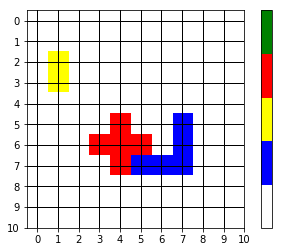

In [97]:
board.init_board()
board.put_piece_on_board(color = board.to_play, piece_name = 'V5', orientation = 'rr', position = (5, 5))
board.update_player()
board.put_piece_on_board(color = board.to_play, piece_name = '2', orientation = 'r', position = (2,1))
board.update_player()
board.put_piece_on_board(color = board.to_play, piece_name = 'X', orientation = 'c', position = (5,3))
board.show()

In [266]:
board.show_available_pieces(board.to_play)

   
 # 
   
    
 ## 
    
     
 ### 
     
    
 ## 
 #  
    
      
 #### 
      
     
 ### 
 #   
     
     
 ### 
  #  
     
    
 ## 
 ## 
    
     
 ##  
  ## 
     
       
 ##### 
       
      
 #### 
 #    
      
      
 #### 
  #   
      
     
 ### 
 ##  
     
     
 ### 
 # # 
     
     
 ### 
 #   
 #   
     
     
 ### 
  #  
  #  
     
      
 ###  
   ## 
      
     
 ##  
  ## 
  #  
     
     
 ##  
  ## 
   # 
     
     
 ##  
  #  
  ## 
     
     
  #  
 ### 
  #  
     


## Main script

In [ ]:
# ---------------------------------------------------------------------------------------- /main.py
# -*- coding: utf-8 -*-
import os
my_dir = os.path.expanduser('~/Documents/GitHub/blokai/')
os.chdir(my_dir) # change directory

# Example with piece Z4
from modules.piece import Piece, corners
my_piece = Piece([(3, -1), (3, 0), (4, 0), (4, 1)], 'Z4')
print(my_piece)
print(len(my_piece))
my_piece.text_repr()
my_piece.summary()
my_piece.summary(with_corners = False)
my_piece.size()
my_piece.nb_of_repr()
print(my_piece.forms['r'])
print(corners(my_piece.forms['r']))

# Bag of pieces
from modules.piece import BagOfPieces
bag = BagOfPieces(color = 'blue', player = 0)
[bag[i].text_repr() for i in range(len(bag))]
[bag[i].summary() for i in range(len(bag))]
bag.color # blue (color of the bag)
bag[8].color # blue (color of the piece inside the bag)


# *** Some links ***
# https://www.cc.gatech.edu/~isbell/classes/2003/cs4600_fall/projects/project2.html
#
# https://project.dke.maastrichtuniversity.nl/games/files/phd/Nijssen_thesis.pdf :
# (2013)
# see 3.4.3 and Fig 3.7
#
# http://artemis.library.tuc.gr/DT2014-0060/DT2014-0060.pdf
# (2014)

# http://www.eecg.toronto.edu/~choijon5/pubs/FPT2013_competition.pdf
# (2013)
#


# *** General tasks ***
# 1. program game rules
# 1.a pieces: OK
# 1.b board
#   - create board
#   - find empty corners on the board for current player,
#   - find list of couples (piece, orientation) available at a turn
# 1.c general game
#   - alternating players and user decision of playing
#   - alternating players and random decision of playing
# 1.d end of game
#   - pass when no more available move
#   - computation of score
# 1.e checking game carefully
#
# 2. algorithm
# 2.a old methods and try them
# 2.b new